# Caterpillar Scraper 

The following application aims the extraction for Data from a local Blockchain where Caterpillar runs on. 
First the data gets extracted and displayed for inspection and then transformed into XES Format. A separate file gets created containing the transformed data, which can be used for a Process Mining tool such as Prom. 



## User manual

In ordet to run the tool, the user should have Caterpillar installed and running on his device. 
Additionally, once the creation of instances is concluded, ganache-cli has to be kept running and web3 and openxes installed on the users notebook. 
In order to access the data, the listing has to be inserted into the notebook.
The application consists of two sections, first, the extraction of data and the transformation to XES format. 


## Examplary Model

The image below represents the process used in Caterpillar. 
Having a Travel Agency serving multiple Customers and Airlines, a Blockchain may very well be suitable for the process. 
The files were created using BPMN.io and the xml export adjusted for the usage with Caterpillar. 
The initial process was taken from "Fundamentals of Business Process Modelling" by Marlon Dumas et. al. and adjusted by reducing the variety of elements and the structure in order to establish compatibility with Caterpillar. 


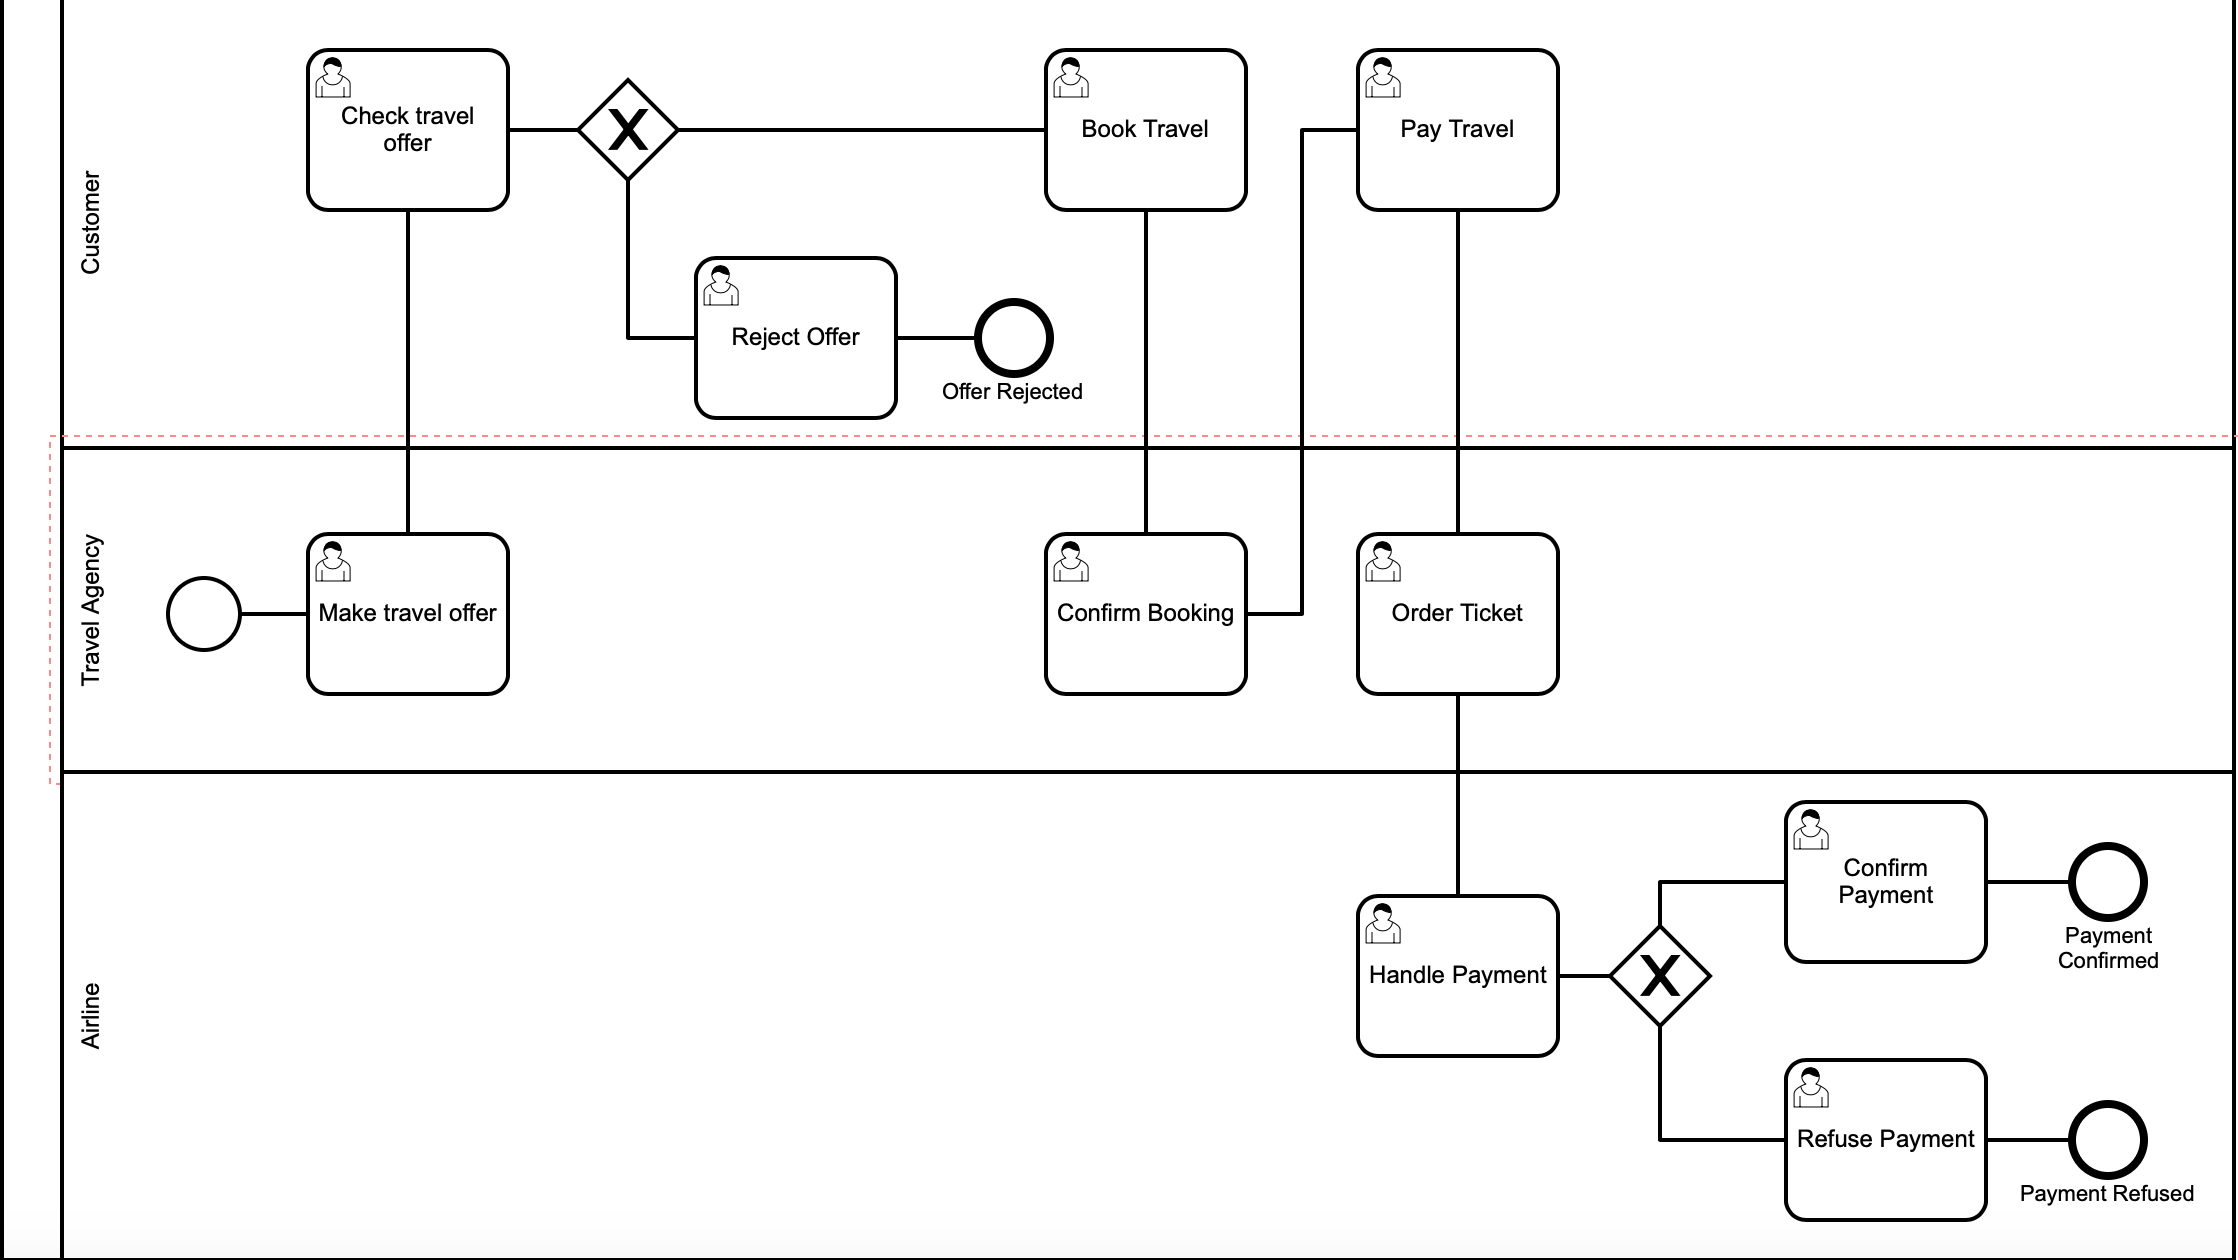

In [57]:
#Import process image
from IPython.display import Image
Image("./Desktop/Travel_Agency.png")

# Calculate Hash for each Activity

## Import Packages

In [1]:
from Crypto.Hash import keccak

from ethereum.utils import sha3

In [21]:
activities = {}

activity_names = [
    "Make travel offer",
    "Check travel offer",
    "Reject Offer",
    "Book Travel",
    "Confirm Booking",
    "Pay Travel",
    "Order Ticket",
    "Handle Payment",
    "Confirm Payment",
    "Refuse Payment"
]

activity_names_function_signatures = [
    "Make_travel_offer(uint256)",
    "Check_travel_offer(uint256,bool)",
    "Reject_Offer(uint256)",
    "Book_Travel(uint256)",
    "Confirm_Booking(uint256)",
    "Pay_Travel(uint256)",
    "Order_Ticket(uint256)",
    "Handle_Payment(uint256,bool)",
    "Confirm_Payment(uint256)",
    "Refuse_Payment(uint256)"
]

activity_names_resource = [
    "Travel Agency",
    "Customer",
    "Customer",
    "Customer",
    "Travel Agency",
    "Customer",
    "Travel Agency",
    "Airline",
    "Airline",
    "Airline"
]

for idx, activity_name_function_signature in enumerate(activity_names_function_signatures):
    keccak_hash = keccak.new(digest_bits=256)
    
    activity_name_byte = str.encode(activity_name_function_signature)
    activity_name_hash = keccak_hash.update(activity_name_byte)
    activity_name_hexdigest = activity_name_hash.hexdigest()
    
    activity_name_id = activity_name_hexdigest[:8] 
    print(f"{activity_name_id} : {activity_name_function_signature} : {activity_names[idx]} : {activity_names_resource[idx]}")
    
    activities[activity_name_id] = {
        "function_signature": activity_name_function_signature,
        "name": activity_names[idx],
        "resource": activity_names_resource[idx]
    }

928f800b : Make_travel_offer(uint256) : Make travel offer : Travel Agency
ca916535 : Check_travel_offer(uint256,bool) : Check travel offer : Customer
b3cb2bd6 : Reject_Offer(uint256) : Reject Offer : Customer
5c41e04f : Book_Travel(uint256) : Book Travel : Customer
b1392d7e : Confirm_Booking(uint256) : Confirm Booking : Travel Agency
bbd382e1 : Pay_Travel(uint256) : Pay Travel : Customer
b20f6c88 : Order_Ticket(uint256) : Order Ticket : Travel Agency
d3f0d749 : Handle_Payment(uint256,bool) : Handle Payment : Airline
27456453 : Confirm_Payment(uint256) : Confirm Payment : Airline
239967d5 : Refuse_Payment(uint256) : Refuse Payment : Airline


| Activity Name | Function Signature | First 4 Bytes of SHA3 Value |
|-----------|---------------|-----------|
| Make travel offer | Make_travel_offer(uint256) | 928f800b |
| Check travel offer | Check_travel_offer(uint256,bool) | ca916535 |
| Reject Offer | Reject_Offer(uint256) | b3cb2bd6 |
| Book Travel | Book_Travel(uint256) | 5c41e04f |
| Confirm Booking | Confirm_Booking(uint256) | b1392d7e |
| Pay Travel | Pay_Travel(uint256) | bbd382e1 |
| Order Ticket | Order_Ticket(uint256) | b20f6c88 |
| Handle Payment | Handle_Payment(uint256,bool) | d3f0d749 |
| Confirm Payment | Confirm_Payment(uint256) | 27456453 |
| Refuse Payment | Refuse_Payment(uint256) | 239967d5 |

# Data extraction from caterpillar

The following part is aimed at extracting the data from the private (i.e. here local and private) Blockchain where Caterpillar is running on.

> <span style="color:red">WARNING</span>
>
> The code in this section only works when Caterpillar is running.

## Import Packages

In [1]:
#import web3
#NOTE: first install web3: npm install --save web3
from web3.auto import Web3

#import pickle to save data from blockchain into a separate file as a backup
import pickle

## Extract Data

In [2]:
# assign to local blockchain address from ganache-cli, where the listing is on
web3 = Web3(Web3.HTTPProvider("http://127.0.0.1:8545"))

In [3]:
#get the latest block to display for information inspection
block = web3.eth.getBlock('latest')

In [4]:
#print out block and inspect information it contains
block

AttributeDict({'number': 55,
 'hash': HexBytes('0x34addd6160dc4ead235910d2e30675fa13e8ea4f4361bb2e0250b8d1129c34b4'),
 'parentHash': HexBytes('0xc39824414b38cdff0b3abc3f6cae48e2429500e591900e40ff82fdf9ca10d604'),
 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'transactionsRo

In [55]:
#inspect transaction information from random blocks 
web3.eth.getTransactionFromBlock(web3.eth.blockNumber, 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: getTransactionFromBlock is deprecated in favor of w3.eth.getTransactionByBlock
  


AttributeDict({'hash': HexBytes('0x21b90a3988c9b16df6a8d9683c03c2f09dd596df65a21f63a7e2c909480c1629'),
 'nonce': 1,
 'blockHash': HexBytes('0x34addd6160dc4ead235910d2e30675fa13e8ea4f4361bb2e0250b8d1129c34b4'),
 'blockNumber': 55,
 'transactionIndex': 0,
 'from': '0x41B96DBCFa1cA1eCB406f7EB29d6d81a02002Fc1',
 'to': '0x667CEC4a53c9a956a32243BDC18dDA6F68a50F2F',
 'value': 0,
 'gas': 4700000,
 'gasPrice': 20000000000,
 'input': '0x239967d5000000000000000000000000000000000000000000000000000000000000001a',
 'v': 27,
 'r': HexBytes('0xd432dffedd8cb9ae991a912e22ecc2e683e8174ed11c67632e1ad6a8e3aae6d9'),
 's': HexBytes('0x06744fbc4e0a45e7ad0124b7a48e553a879efb869c28a1755fd9f82abf65342d')})

In [7]:
start_block_number = 1
end_block_number = web3.eth.blockNumber

In [14]:
#create list with block numbers to iterate later over all blocks 
block_numbers = list(range(start_block_number, end_block_number+1))

In [27]:
# save all blocks including their data to a pickel file 
blocks = []
for block_number in block_numbers:
    block = web3.eth.getBlock(block_number)
    blocks.append(block)
    
    
file_name = "caterpillar_blocks"
outfile = open(file_name, "wb")
pickle.dump(blocks, outfile)
outfile.close()

In [28]:
#save all transactions to a pickle file
transactions = []
for block_number in block_numbers:
    transaction = web3.eth.getTransactionByBlock(block_number, 0)
    transactions.append(transaction)
    
file_name = "caterpillar_transactions"
outfile = open(file_name, "wb")
pickle.dump(transactions, outfile)
outfile.close()

In [8]:
#inspect number of blocks 
end_block_number

55

In [15]:
#get the number of transactions by block
for block_number in block_numbers:
    
    print('block',block_number, 'has', web3.eth.getBlockTransactionCount(block_number), 'transaction(s)')


block 1 has 1 transaction(s)
block 2 has 1 transaction(s)
block 3 has 1 transaction(s)
block 4 has 1 transaction(s)
block 5 has 1 transaction(s)
block 6 has 1 transaction(s)
block 7 has 1 transaction(s)
block 8 has 1 transaction(s)
block 9 has 1 transaction(s)
block 10 has 1 transaction(s)
block 11 has 1 transaction(s)
block 12 has 1 transaction(s)
block 13 has 1 transaction(s)
block 14 has 1 transaction(s)
block 15 has 1 transaction(s)
block 16 has 1 transaction(s)
block 17 has 1 transaction(s)
block 18 has 1 transaction(s)
block 19 has 1 transaction(s)
block 20 has 1 transaction(s)
block 21 has 1 transaction(s)
block 22 has 1 transaction(s)
block 23 has 1 transaction(s)
block 24 has 1 transaction(s)
block 25 has 1 transaction(s)
block 26 has 1 transaction(s)
block 27 has 1 transaction(s)
block 28 has 1 transaction(s)
block 29 has 1 transaction(s)
block 30 has 1 transaction(s)
block 31 has 1 transaction(s)
block 32 has 1 transaction(s)
block 33 has 1 transaction(s)
block 34 has 1 tran

In [16]:
# display all data from transactions 
process_data = {}
for block_number in block_numbers:
    process_data[block_number] = web3.eth.getTransactionByBlock(block_number, 0)
    print(web3.eth.getTransactionByBlock(block_number, 0))

AttributeDict({'hash': HexBytes('0x4ee58dbd70521beea690410d1bd49cbfec2328c742e9629c9eed52bae7fdd47e'), 'nonce': 0, 'blockHash': HexBytes('0x44a92050bab7c9a967b799b9baa5228669a36a173444f4228dfe989e5925c62f'), 'blockNumber': 1, 'transactionIndex': 0, 'from': '0xEd015cEa518ec088f21e61B0E60bB8Fccde28dBd', 'to': None, 'value': 0, 'gas': 4700000, 'gasPrice': 20000000000, 'input': '0x608060405234801561001057600080fd5b506109e1806100206000396000f3006080604052600436106100c15763ffffffff60e060020a6000350416633c2f384981146100c657806349daa989146100f0578063533524a51461011657806354b65f161461015357806358e031bf1461017457806362b40ddd1461019257806378217c8d146101aa578063788b8410146101c557806384b9b07f146101e6578063a684e12714610207578063c87115a914610228578063cdd2e1641461024c578063ee35d4b714610270578063fa60dd391461028e578063fdcc596b146102f3575b600080fd5b3480156100d257600080fd5b506100de60043561031d565b60408051918252519081900360200190f35b3480156100fc57600080fd5b50610114600435600160a060020a036024351661032f565b00

AttributeDict({'hash': HexBytes('0xf10da244ecfb3532321e60aa6283955fcc3ce872d56d05b196dac5ccaab5811e'), 'nonce': 12, 'blockHash': HexBytes('0x2f4edfb2d8d434c005b0ab0b5d15205be6b1147cce2300164e55e437b44e28e9'), 'blockNumber': 13, 'transactionIndex': 0, 'from': '0xEd015cEa518ec088f21e61B0E60bB8Fccde28dBd', 'to': '0x667CEC4a53c9a956a32243BDC18dDA6F68a50F2F', 'value': 0, 'gas': 4700000, 'gasPrice': 20000000000, 'input': '0x928f800b0000000000000000000000000000000000000000000000000000000000000000', 'v': 27, 'r': HexBytes('0x4e3539093c1b6844637d69c23e5b2d3b49fb0b33a8eaa5c44931f1bdb79ac96e'), 's': HexBytes('0x33b587bb7e5a138e890ae7fecd0de2cc90cfb6ceae9630e2bb3923448793562e')})
AttributeDict({'hash': HexBytes('0xbc588c9d376f09956aefa36527023780ee3fa3161b6236626f80d7c8b8184236'), 'nonce': 13, 'blockHash': HexBytes('0xcc826bb5a14316fff7e391bee141ef56ef8332c6825872f7234416fe0238b358'), 'blockNumber': 14, 'transactionIndex': 0, 'from': '0xEd015cEa518ec088f21e61B0E60bB8Fccde28dBd', 'to': '0x2F8A549b8

AttributeDict({'hash': HexBytes('0x03997414cf97d6927e397a0229bda6c0186c57ed73be61a9acc00609deecf98d'), 'nonce': 1, 'blockHash': HexBytes('0x3fddc02af2f2227a14d9cac0603b29d44664871100558f084c9c4bb119251212'), 'blockNumber': 25, 'transactionIndex': 0, 'from': '0x9D7e2112536244b2D53374C5a8Dbe196fD2506A3', 'to': '0x4d60edF6ba21433Bb32CB93F1c7355a98487E707', 'value': 0, 'gas': 4700000, 'gasPrice': 20000000000, 'input': '0x83bb92cc00000000000000000000000000000000000000000000000000000000000000010000000000000000000000009d7e2112536244b2d53374c5a8dbe196fd2506a300000000000000000000000000461877bf708321a7591e2027e794ecc5ecd29d', 'v': 28, 'r': HexBytes('0x5787acc91556ceeece6e0fc315d04501386bea0931d4373e0eed3b6c47520f48'), 's': HexBytes('0x3e4aa5d061e8c97b0c356547676e9e6a53333c605aef5cd720689854f4d55b10')})
AttributeDict({'hash': HexBytes('0xdaa12cb1994d149e62ede9b1e199a26ca415c0a02f7afc73162e8f5f19de7755'), 'nonce': 2, 'blockHash': HexBytes('0xac4bb49135574213bb322b8011c3b1f6d8191b9d4388966ac860afa7

AttributeDict({'hash': HexBytes('0x571ab23efc0e941eb7752deec9f433043b204e8dc03f059b914d5a0b50a8890b'), 'nonce': 9, 'blockHash': HexBytes('0x60a40afc8cee0863aad52eb2b066ec864309ad44348dad6a5fc94610afc98b8f'), 'blockNumber': 46, 'transactionIndex': 0, 'from': '0x9D7e2112536244b2D53374C5a8Dbe196fD2506A3', 'to': '0x667CEC4a53c9a956a32243BDC18dDA6F68a50F2F', 'value': 0, 'gas': 4700000, 'gasPrice': 20000000000, 'input': '0x928f800b0000000000000000000000000000000000000000000000000000000000000013', 'v': 27, 'r': HexBytes('0x5cd12730b84521a96c0c158c83cafd8a47b7d13ef808e6af704bab5ddb5d2519'), 's': HexBytes('0x6fbe633129f7816496b76dd5a4afdc97fdd4122d8f47d3ac40be2d286ad3a018')})
AttributeDict({'hash': HexBytes('0xb6afa38a1d426f4e282c3b3ee86a2db83be44f81d248390d3842d1ac48afe3d0'), 'nonce': 10, 'blockHash': HexBytes('0xd54fd987831d7027c060c8752a529be12d903354e8686a0e392855b9aa175a00'), 'blockNumber': 47, 'transactionIndex': 0, 'from': '0x9D7e2112536244b2D53374C5a8Dbe196fD2506A3', 'to': '0x6956CcEDEF

In [29]:
# display all data from blocks 
blocks

[AttributeDict({'number': 1, 'hash': HexBytes('0x44a92050bab7c9a967b799b9baa5228669a36a173444f4228dfe989e5925c62f'), 'parentHash': HexBytes('0xef6a9d4c7498056ff656031e0704bc2396163e13da241503fe0b7a3a66588cb2'), 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'), 'nonce': HexBytes('0x0000000000000000'), 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'), 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'), 'transactionsRoot': He

# XES Transformation

The following lines of code transform the data extracted from the private Blockchain into XES format. 

## Import Packages

In [23]:
import pickle

## Load Pickle Files

In [24]:
blocks = pickle.load(open("./caterpillar_blocks", "rb"))
transactions = pickle.load(open("./caterpillar_transactions", "rb"))

In [25]:
blocks

[AttributeDict({'number': 1,
  'hash': HexBytes('0x2bf77da7cd7d691d3286d6e6e9cbc1a59ab64cd51b5ec344ca5a9d4a6ddaa7a2'),
  'parentHash': HexBytes('0x8b618fe1dd266c053cdae40975c05d07fb6dcfcb6a16b6f5e960dd4c859894e5'),
  'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
  'nonce': HexBytes('0x0000000000000000'),
  'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
  'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
  'transac

In [26]:
blocks_dic = {}
for block in blocks:
    block_number = block['number']
    blocks_dic[block_number] = block

In [27]:
blocks_dic

{1: AttributeDict({'number': 1,
  'hash': HexBytes('0x2bf77da7cd7d691d3286d6e6e9cbc1a59ab64cd51b5ec344ca5a9d4a6ddaa7a2'),
  'parentHash': HexBytes('0x8b618fe1dd266c053cdae40975c05d07fb6dcfcb6a16b6f5e960dd4c859894e5'),
  'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
  'nonce': HexBytes('0x0000000000000000'),
  'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
  'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
  'tran

In [28]:
transactions

[AttributeDict({'hash': HexBytes('0xcd038200f3193769f274bb13de833ccbb242037f3b4ec12fd49402226204cd65'),
  'nonce': 0,
  'blockHash': HexBytes('0x2bf77da7cd7d691d3286d6e6e9cbc1a59ab64cd51b5ec344ca5a9d4a6ddaa7a2'),
  'blockNumber': 1,
  'transactionIndex': 0,
  'from': '0x2C554D496528D58B26718eb91e17af894fa981ac',
  'to': None,
  'value': 0,
  'gas': 4700000,
  'gasPrice': 20000000000,
  'input': '0x608060405234801561001057600080fd5b506109e1806100206000396000f3006080604052600436106100c15763ffffffff60e060020a6000350416633c2f384981146100c657806349daa989146100f0578063533524a51461011657806354b65f161461015357806358e031bf1461017457806362b40ddd1461019257806378217c8d146101aa578063788b8410146101c557806384b9b07f146101e6578063a684e12714610207578063c87115a914610228578063cdd2e1641461024c578063ee35d4b714610270578063fa60dd391461028e578063fdcc596b146102f3575b600080fd5b3480156100d257600080fd5b506100de60043561031d565b60408051918252519081900360200190f35b3480156100fc57600080fd5b50610114600435600160a060020a0

In [47]:
for transaction in transactions:
    activity_id = transaction["input"][2:10]
    if activity_id in activities:
        print(transaction)

AttributeDict({'hash': HexBytes('0x35a244ee4d6278fcb50c0d236146410b2c75ffe0639e6cafebddee026ed043b8'), 'nonce': 12, 'blockHash': HexBytes('0x76555f02e2ec8aff738cfe5d890ac53487244525e422a72377103f4aa7050e80'), 'blockNumber': 13, 'transactionIndex': 0, 'from': '0x2C554D496528D58B26718eb91e17af894fa981ac', 'to': '0xfc8a48E82ad7a4e532a5F95F8043DBA093cba545', 'value': 0, 'gas': 4700000, 'gasPrice': 20000000000, 'input': '0x928f800b0000000000000000000000000000000000000000000000000000000000000000', 'v': 27, 'r': HexBytes('0xe86102f9753669c8cf17f9475a3c808f3f9b1ed01c97f430f63f478433cb2a9d'), 's': HexBytes('0x184b71caeffa7a9bf3713096d8344b3db7bd9cdc24d3156fc35ecfe00f1f8bf6')})
AttributeDict({'hash': HexBytes('0xc22847ac9554c7a99a43777d1278100d0c3a6ee6f18693541480253e5a90a183'), 'nonce': 1, 'blockHash': HexBytes('0x60cdc211a8bb6a7266f5a69e2e420b8a51e5fa774ef72245de4a159a88e2e2a5'), 'blockNumber': 16, 'transactionIndex': 0, 'from': '0xA03D8A04478c5e1E6dD748336079cb00294eA2F0', 'to': '0xfc8a48E82a

In [29]:
print(f"Total number of extracted transactions: {len(transactions)}")

Total number of extracted transactions: 45


In [30]:
for transaction in transactions:
    input_data = transaction["input"]
    
    activity_instance_id = input_data[2:10]
    if activity_instance_id in activities:
        print(f"{activity_instance_id} : {activities[activity_instance_id]}")
    else:
        print(activity_instance_id)

60806040
58e031bf
60806040
49daa989
60806040
cdd2e164
60806040
60806040
ee35d4b7
60806040
fdcc596b
83bb92cc
928f800b : {'function_signature': 'Make_travel_offer(uint256)', 'name': 'Make travel offer', 'resource': 'Travel Agency'}
c8e304d5
ca916535 : {'function_signature': 'Check_travel_offer(uint256,bool)', 'name': 'Check travel offer', 'resource': 'Customer'}
5c41e04f : {'function_signature': 'Book_Travel(uint256)', 'name': 'Book Travel', 'resource': 'Customer'}
b1392d7e : {'function_signature': 'Confirm_Booking(uint256)', 'name': 'Confirm Booking', 'resource': 'Travel Agency'}
bbd382e1 : {'function_signature': 'Pay_Travel(uint256)', 'name': 'Pay Travel', 'resource': 'Customer'}
b20f6c88 : {'function_signature': 'Order_Ticket(uint256)', 'name': 'Order Ticket', 'resource': 'Travel Agency'}
c8e304d5
c8e304d5
c8e304d5
c8e304d5
d3f0d749 : {'function_signature': 'Handle_Payment(uint256,bool)', 'name': 'Handle Payment', 'resource': 'Airline'}
27456453 : {'function_signature': 'Confirm_Payme

#### Approach that should work according to Orlenys

In [39]:
log_dic = {}

for transaction in transactions:
    trace_id = transaction["from"]
    
    input_data = transaction["input"]
    activity_id = input_data[2:10]
    if activity_id not in activities:
        # The transaction does not relate to an activity. We therefore skip the transaction.
        continue
    
    # Some information is wrong or not their at all in the transactions data. We therefore have to fall back on
    # the block. However, this is not a problem since all blocks have one and only one transaction.
    block_number = transaction["blockNumber"]
    block = blocks_dic[block_number]
    
    activity = activities[activity_id]
    activity_name = activity["name"]
    activity_resource = activity["resource"]
    
    activity_instance_id = transaction["hash"].hex()
    activity_instance_id_unix_time_stamp = block["timestamp"]
    activity_instance_id_from = transaction["to"]
    activity_instance_id_gas_used = block["gasUsed"]
    activity_instance_id_gas_limit = block["gasLimit"]
    
    
    activity = {}
    activity["id"] = activity_id
    activity["name"] = activity_name
    activity["resource"] = activity_resource
    activity["instance_id"] = activity_instance_id
    activity["instance_id_unix_time_stamp"] = activity_instance_id_unix_time_stamp
    activity["instance_id_from"] = activity_instance_id_from
    activity["instance_id_gas_used"] = activity_instance_id_gas_used
    activity["instance_id_gas_limit"] = activity_instance_id_gas_limit
    activity["instance_id_transaction_data"] = input_data
    
    if trace_id not in log_dic:
        log_dic[trace_id] = []
    
    log_dic[trace_id].append(activity)
    

In [40]:
log_dic

{'0x2C554D496528D58B26718eb91e17af894fa981ac': [{'id': '928f800b',
   'name': 'Make travel offer',
   'resource': 'Travel Agency',
   'instance_id': '0x35a244ee4d6278fcb50c0d236146410b2c75ffe0639e6cafebddee026ed043b8',
   'instance_id_unix_time_stamp': 1548183227,
   'instance_id_from': '0xfc8a48E82ad7a4e532a5F95F8043DBA093cba545',
   'instance_id_gas_used': 90679,
   'instance_id_gas_limit': 6721975,
   'instance_id_transaction_data': '0x928f800b0000000000000000000000000000000000000000000000000000000000000000'},
  {'id': 'b1392d7e',
   'name': 'Confirm Booking',
   'resource': 'Travel Agency',
   'instance_id': '0x0fc626434ad15ddb387fb5a62d2242494428977e35fdd71855bed1f4c74ef6b4',
   'instance_id_unix_time_stamp': 1548183316,
   'instance_id_from': '0xfc8a48E82ad7a4e532a5F95F8043DBA093cba545',
   'instance_id_gas_used': 91171,
   'instance_id_gas_limit': 6721975,
   'instance_id_transaction_data': '0xb1392d7e0000000000000000000000000000000000000000000000000000000000000003'},
  {'id': '

In [42]:
print(f"Number of found process instances: {len(log_dic)}")

Number of found process instances: 8


Obviously, it does not work since we did only run the process 3 times.

#### How it actually works

In [31]:
log_dic = {}
process_instance = 0

# A new address indicates a new process instance.
first_activity_name = "Make travel offer"
addresses_of_first_activity = []

for transaction in transactions:
    input_data = transaction["input"]
    activity_id = input_data[2:10]
    if activity_id not in activities:
        # The transaction does not relate to an activity. We therefore skip the transaction.
        continue
    
    # Some information is wrong or not their at all in the transactions data. We therefore have to fall back on
    # the block. However, this is not a problem since all blocks have one and only one transaction.
    block_number = transaction["blockNumber"]
    block = blocks_dic[block_number]
    
    activity = activities[activity_id]
    
    activity_name = activity["name"]
    activity_resource = activity["resource"]
    activity_instance_id = transaction["hash"].hex()
    activity_instance_id_unix_time_stamp = block["timestamp"]
    activity_instance_id_to = transaction["to"]
    activity_instance_id_gas_used = block["gasUsed"]
    activity_instance_id_gas_limit = block["gasLimit"]
    
    
    activity = {}
    activity["id"] = activity_id
    activity["name"] = activity_name
    activity["resource"] = activity_resource
    activity["instance_id"] = activity_instance_id
    activity["instance_id_unix_time_stamp"] = activity_instance_id_unix_time_stamp
    activity["instance_id_to"] = activity_instance_id_to
    activity["instance_id_gas_used"] = activity_instance_id_gas_used
    activity["instance_id_gas_limit"] = activity_instance_id_gas_limit
    activity["instance_id_transaction_data"] = input_data
    
    sender = transaction["from"]
    if activity_name == first_activity_name:
        # It may be a new process instance, if .....
        if sender not in addresses_of_first_activity:
            # we have not seen this address before. 
            # This is done to catch cases where the first activity is in a loop.
            process_instance += 1
            log_dic[process_instance] = {}
            log_dic[process_instance]["activities"] = []
            log_dic[process_instance]["senders"] = set()
            log_dic[process_instance]["senders"].add(sender)
            addresses_of_first_activity.append(sender)
    
    sender_found = False
    for trace_id, trace in log_dic.items():
        senders = trace["senders"]
        if sender in senders:
            log_dic[trace_id]["activities"].append(activity)
            sender_found = True
            continue
    
    if sender_found:
        continue
            
    # It is not a new process instance and neither has the sender been seen before.
    # Now we have a problem since we can not always determine to which process_id it belongs.
    # One example goes like this:
    # Assume we have 2 process instances and the first activity has been executed. We then have the traces
    # P1: A1
    # P2: A1
    # And now, activity A2 comes in. To which process instance should we assign it?
    # Easy and naive solution: Always assign the new address to the process instance
    # that has been created first. In the example, this is P1.
    # Also easy and naive: Always assign the new address the the youngest process instance. This would
    # then be P2.
    # Remember: The youngest process instance is in our case the one with the current value of.
    # If you want to be funny: Randomly assign it to one of the candidates.
    
    # Second Approach
    log_dic[process_instance]["senders"].add(sender)
    log_dic[process_instance]["activities"].append(activity)

In [32]:
log_dic

{1: {'activities': [{'id': '928f800b',
    'name': 'Make travel offer',
    'resource': 'Travel Agency',
    'instance_id': '0x35a244ee4d6278fcb50c0d236146410b2c75ffe0639e6cafebddee026ed043b8',
    'instance_id_unix_time_stamp': 1548183227,
    'instance_id_to': '0xfc8a48E82ad7a4e532a5F95F8043DBA093cba545',
    'instance_id_gas_used': 90679,
    'instance_id_gas_limit': 6721975,
    'instance_id_transaction_data': '0x928f800b0000000000000000000000000000000000000000000000000000000000000000'},
   {'id': 'ca916535',
    'name': 'Check travel offer',
    'resource': 'Customer',
    'instance_id': '0xc3a153f3f969d28a79f89db15113df196383c5ece30ec98a2fbaa438a5e634e9',
    'instance_id_unix_time_stamp': 1548183297,
    'instance_id_to': '0xfc8a48E82ad7a4e532a5F95F8043DBA093cba545',
    'instance_id_gas_used': 111816,
    'instance_id_gas_limit': 6721975,
    'instance_id_transaction_data': '0xca9165350000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000

In [33]:
print(f"Number of found process instances: {len(log_dic)}")

Number of found process instances: 3


In the terminal type
```sh
pip install openxes
```
to install the openxes library.

In [34]:
from opyenxes.data_out.XesXmlSerializer import XesXmlSerializer

from opyenxes.factory.XFactory import XFactory
from opyenxes.factory.XFactoryRegistry import XFactoryRegistry

from opyenxes.extension.XExtension import XExtension
from opyenxes.extension.XExtensionManager import XExtensionManager

from opyenxes.extension.std.XConceptExtension import XConceptExtension
from opyenxes.extension.std.XTimeExtension import XTimeExtension
from opyenxes.extension.std.XOrganizationalExtension import XOrganizationalExtension
from opyenxes.extension.std.XLifecycleExtension import XLifecycleExtension
from opyenxes.extension.std.XCostExtension import XCostExtension
from opyenxes.extension.std.XIdentityExtension import XIdentityExtension

In [35]:
concept_name = XConceptExtension()
time_extension = XTimeExtension()
organizational_extension = XOrganizationalExtension()
lifecycle_extension = XLifecycleExtension()
cost_extension = XCostExtension()
identitity_extension = XIdentityExtension()

XExtensionManager().register_standard_extensions()

In [36]:
# create log 
log_xes = XFactory.create_log()
log_xes.get_extensions().add(concept_name)
log_xes.get_extensions().add(time_extension)
log_xes.get_extensions().add(organizational_extension)
log_xes.get_extensions().add(lifecycle_extension)
log_xes.get_extensions().add(cost_extension)
log_xes.get_extensions().add(identitity_extension)

# set process attributes
concept_name.assign_name(element=log_xes, name="Travel Agency Process")
lifecycle_extension.assign_model(log=log_xes, model="standard")


#iterate over all process instances 
for trace_id, trace_dic in log_dic.items():
    trace = XFactory.create_trace()
    _id = XFactory.create_attribute_literal("id", trace_id)
    trace.get_attributes()["id"] = _id
    
    # iterate over all activities within process instance and calculate the total cost.
    trace_gas = 0
    trace_activites = trace_dic["activities"]
    for activity in trace_activites:
        event = XFactory.create_event()
        
        activity_id = XFactory.create_attribute_literal("activity_id", activity["id"])
        event.get_attributes()["activity_id"] = activity_id
        
        concept_name.assign_name(element=event, name=activity["name"])
        
        activity_insance_id = XFactory.create_attribute_literal("instance_id", activity["instance_id"])
        event.get_attributes()["instance_id"] = activity_insance_id
        
        time_extension.assign_timestamp(event=event, date=activity["instance_id_unix_time_stamp"])
        lifecycle_extension.assign_transition(event=event, transition="complete")
        
        gas = activity["instance_id_gas_used"]
        trace_gas += gas
        cost_extension.assign_total(element=event, total=gas)
        
        trace.append(event)
    
    cost_extension.assign_total(element=trace, total=trace_gas)
    #after appending to trace, append to log_xes
    log_xes.append(trace)
    #save log in xes format in a searate file on the hard drive  

with open("./travel_agency.xes", "w") as file:
    XesXmlSerializer().serialize(log_xes, file)

Importance: DEBUG
Message: Start serializing log to XES.XML

Importance: DEBUG
Message: finished serializing log (16.138916015625 msec.)

